In [ ]:
#Importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("Cleaned_FlightData.csv")

In [ ]:
df.head()

### Data Visualization

###  Airline vs Price

In [ ]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

* From graph we can see that Jet Airways Business have the highest Price.
*  Apart from the first Airline almost all are having similar median.

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True,dtype=int)

Airline.head()

### Source vs Price

In [ ]:
df['Source'].value_counts()

In [ ]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.title("Source vs Price Distribution")
plt.show()

The place from where passengers will travel to the destination and we can see that Banglore is the source location has the most outliers while Chennai has the least.

In [ ]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True,dtype=int)

Source.head()

# Destination vs Price Distribution

In [ ]:
df["Destination"].value_counts()

In [ ]:

plt.figure(figsize=(20,10))
sns.boxplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False))
plt.title("Source vs Price Distribution")
plt.show()

In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True,dtype=int)

Destination.head()

#### Route and Additional_Info 

In [ ]:
df["Route"].nunique()

In [ ]:
df.head()

In [ ]:
df['Additional_Info'].value_counts()

In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
df.head()

# Month Wise Analysis

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')


May has the most number of flights.

### Plotting Ticket Prices vs Airlines

In [ ]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

## Correlation Between all Features

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(numeric_only=True), annot = True,cmap = "RdYlGn")
plt.show()

Concatenating both Categorical Data and Numerical Data

In [ ]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df_final = pd.concat([df, Airline, Source, Destination], axis = 1)

In [ ]:
df_final.head(3)

In [ ]:
df_final.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [ ]:
df_final.head(3)

In [ ]:
df_final.shape

## Train Test Split

In [ ]:
X=df_final.drop("Price",axis=1)
X.head()

In [ ]:
y=df_final['Price']
y.head()

In [ ]:
# Now we will be splitting out our dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of training input is", X_test.shape)
print("The size of training output is", y_test.shape)

# Model building


In [115]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [118]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.histplot(y_test-predictions,kde=True)  

Model is: LinearRegression()
Training score: 0.6252687760140121
Predictions are: [ 6084.6754215   6559.46743052 11535.5295582  ... 10882.26974782
  4422.26246179  7319.06605887]


r2 score is: 0.6143747901938554
MAE:1988.9273534376935
MSE:8449254.385803323
RMSE:2906.7601183797956


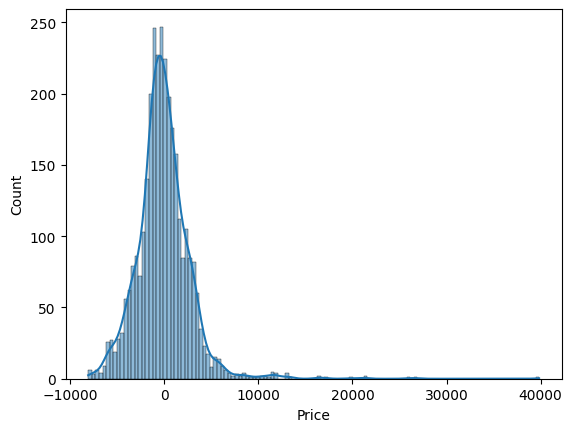

In [119]:
predict(LinearRegression())

Model is: RandomForestRegressor()
Training score: 0.9557357134281507
Predictions are: [ 4982.79        4781.8625     12449.24       ... 14285.98333333
  3798.084       5881.8425    ]


r2 score is: 0.7780997580691118
MAE:1205.994723944581
MSE:4861952.861660398
RMSE:2204.983642039187


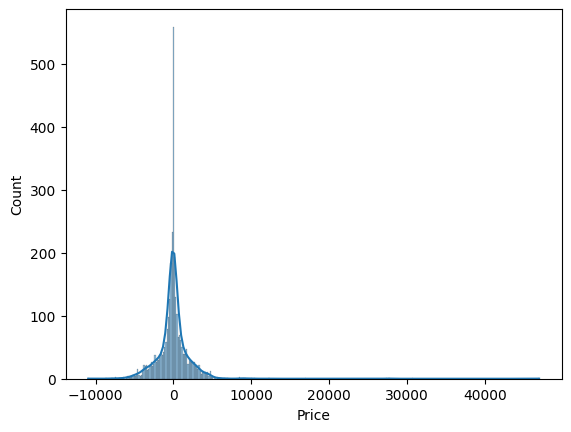

In [120]:
predict(RandomForestRegressor())

Model is: KNeighborsRegressor()
Training score: 0.733019883082431
Predictions are: [ 5217.6  6024.  12108.2 ... 13206.2  3764.2  5877.2]


r2 score is: 0.5267316373965896
MAE:1937.8781389420012
MSE:10369562.691191843
RMSE:3220.1805370494126


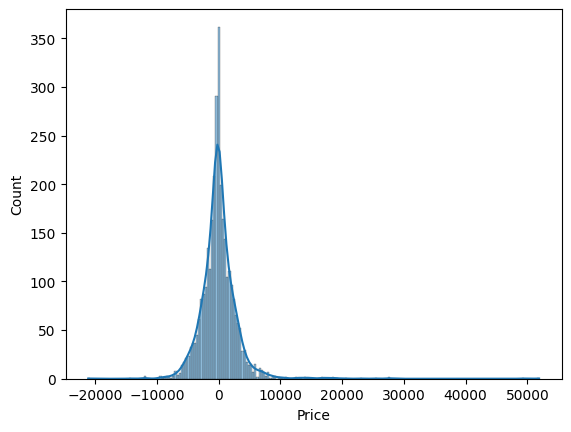

In [121]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9724483043004011
Predictions are: [ 4760.   4050.  12373.  ... 14781.   3911.   6517.5]


r2 score is: 0.6508866439455154
MAE:1430.9662736350115
MSE:7649260.161877699
RMSE:2765.729589435254


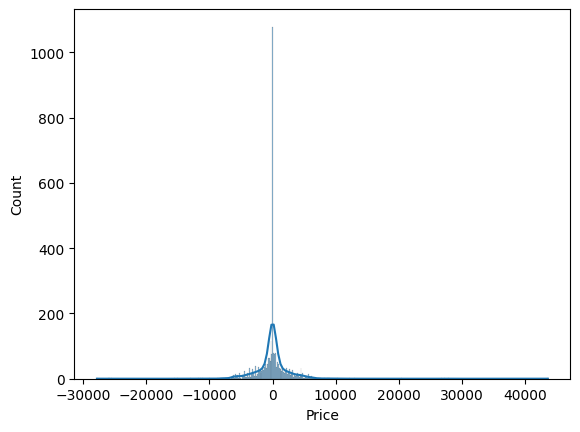

In [122]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: -0.023827646495439447
Predictions are: [8371.83661985 8371.76296091 8372.01146238 ... 8371.89897648 8371.73016062
 8371.61540171]


r2 score is: -0.012354545904154302
MAE:3580.0945814864044
MSE:22181229.000221636
RMSE:4709.6952130919935


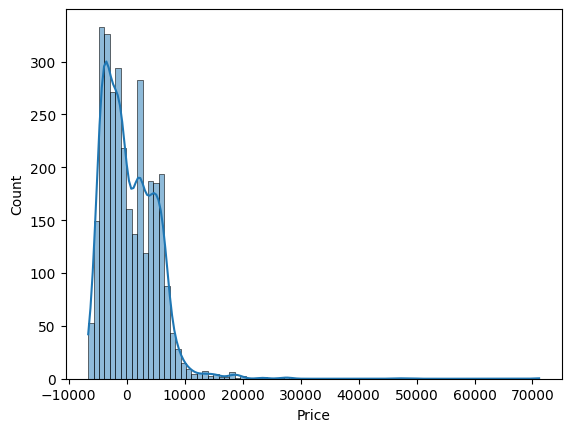

In [123]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.7821255885262441
Predictions are: [ 4894.52228811  5847.85198573 11576.7008378  ... 12165.1759439
  3998.58349021  6088.96175223]


r2 score is: 0.7535695211491966
MAE:1574.788205520833
MSE:5399423.459043229
RMSE:2323.6659525506734


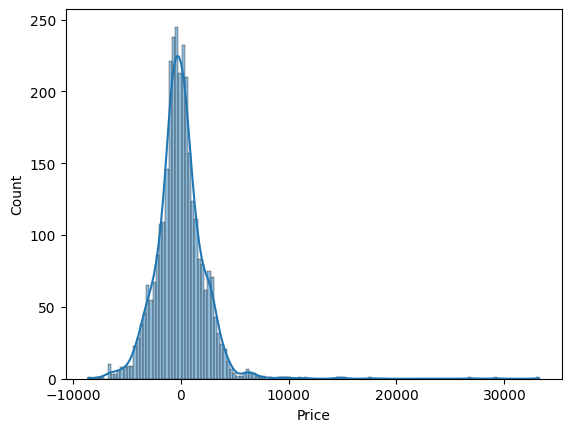

In [124]:

predict(GradientBoostingRegressor())

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [130]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [133]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [134]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Users\hp\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\hp\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  F

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [135]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [136]:
prediction = rf_random.predict(X_test)

<Figure size 800x800 with 0 Axes>

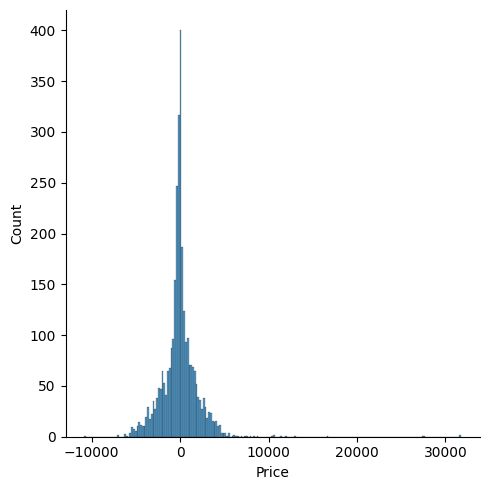

In [140]:
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()

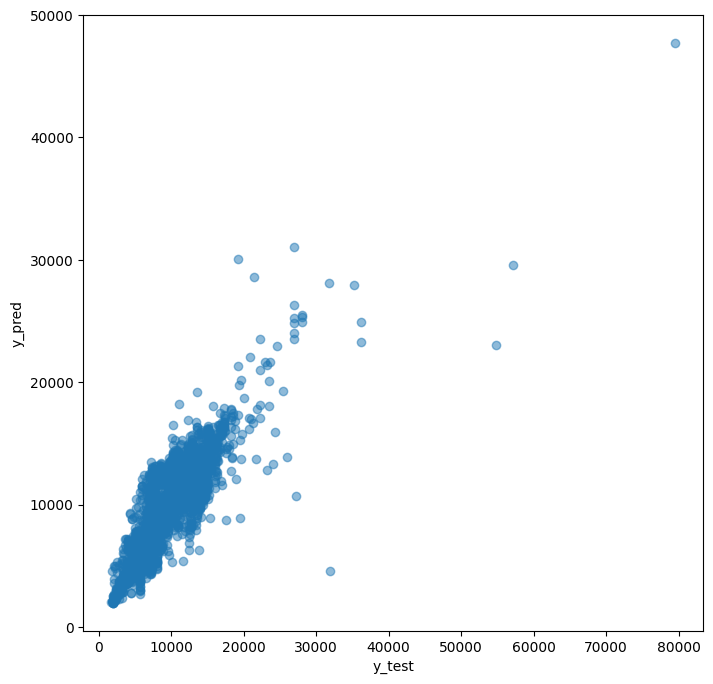

In [141]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [142]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1305.6587362073362
MSE: 4761616.492029414
RMSE: 2182.11285043405


## Save the model to reuse it again

In [145]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [147]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [148]:
y_prediction = forest.predict(X_test)

In [149]:
metrics.r2_score(y_test, y_prediction)

0.7833395857360864